# Quantum Fourier trainsform for number of qubits 6

In [0]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer, IBMQ
from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer, qx_color_scheme


### QFT Algorithm

In [0]:
def input_state(circ, q, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(math.pi/float(2**(j)), q[j]).inverse()


def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), q[j], q[k])
        circ.h(q[j])



### QFT Circuit

In [0]:
# Create a Quantum Register called "q" with 6 qubits
q = QuantumRegister(6, "q")
c = ClassicalRegister(6, "c")
qft3 = QuantumCircuit(q, c, name="qft3")
qft4 = QuantumCircuit(q, c, name="qft4")
qft5 = QuantumCircuit(q, c, name="qft5")
qft6 = QuantumCircuit(q, c, name="qft6")


### Input states and QFT defined for each circuit considered above

In [0]:
input_state(qft3, q, 3)
qft3.barrier()
qft(qft3, q, 3)
qft3.barrier()
for j in range(3):
    qft3.measure(q[j], c[j])

input_state(qft4, q, 4)
qft4.barrier()
qft(qft4, q, 4)
qft4.barrier()
for j in range(4):
    qft4.measure(q[j], c[j])

input_state(qft5, q, 5)
qft5.barrier()
qft(qft5, q, 5)
qft5.barrier()
for j in range(5):
    qft4.measure(q[j], c[j])

input_state(qft6, q, 6)
qft6.barrier()
qft(qft6, q, 6)
qft6.barrier()
for j in range(6):
    qft6.measure(q[j], c[j])

### Visualize the circuit

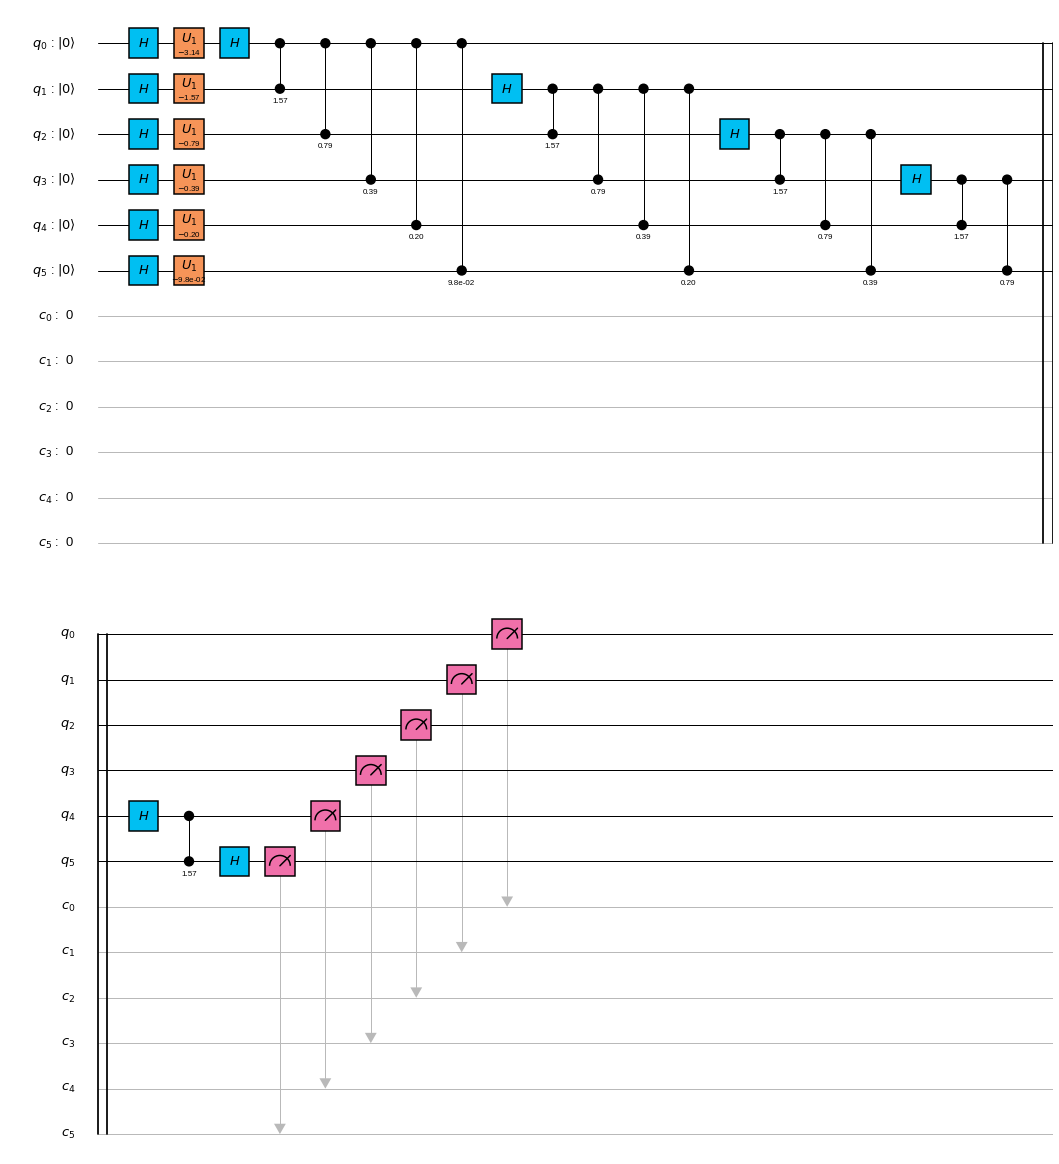

In [20]:
drawer(qft6,style=qx_color_scheme())

### QASM Specifications of the circuit

In [21]:
print(qft3.qasm())
print(qft4.qasm())
print(qft5.qasm())
print(qft6.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[6];
creg c[6];
h q[0];
u1(-3.14159265358979) q[0];
h q[1];
u1(-1.57079632679490) q[1];
h q[2];
u1(-0.785398163397448) q[2];
barrier q[0],q[1],q[2],q[3],q[4],q[5];
h q[0];
cu1(1.57079632679490) q[1],q[0];
h q[1];
cu1(0.785398163397448) q[2],q[0];
cu1(1.57079632679490) q[2],q[1];
h q[2];
barrier q[0],q[1],q[2],q[3],q[4],q[5];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

OPENQASM 2.0;
include "qelib1.inc";
qreg q[6];
creg c[6];
h q[0];
u1(-3.14159265358979) q[0];
h q[1];
u1(-1.57079632679490) q[1];
h q[2];
u1(-0.785398163397448) q[2];
h q[3];
u1(-0.392699081698724) q[3];
barrier q[0],q[1],q[2],q[3],q[4],q[5];
h q[0];
cu1(1.57079632679490) q[1],q[0];
h q[1];
cu1(0.785398163397448) q[2],q[0];
cu1(1.57079632679490) q[2],q[1];
h q[2];
cu1(0.392699081698724) q[3],q[0];
cu1(0.785398163397448) q[3],q[1];
cu1(1.57079632679490) q[3],q[2];
h q[3];
barrier q[0],q[1],q[2],q[3],q[4],q[5];
measure q[0] -> c[0];
measure q[1] -> c[1];
measu

### Setup the API backend access

In [22]:
IBMQ.save_account('d9eb68796efbdcfc8454042c342fddbaaa8ecadb1728917d50b2c5765abff0f797a2eb9d82416f44df3c545df8178fd16ba14cb9cf6a677ae1b6235766d31d71')
IBMQ.save_account('d9eb68796efbdcfc8454042c342fddbaaa8ecadb1728917d50b2c5765abff0f797a2eb9d82416f44df3c545df8178fd16ba14cb9cf6a677ae1b6235766d31d71', 'URL')

IBMQ.load_accounts()
print("Available backends:")
IBMQ.backends()

/usr/local/lib/python3.6/dist-packages/qiskit/backends/ibmq/ibmqprovider.py:141: UserWarning: Credentials are already stored.
  warnings.warn('Credentials are already stored.')
/usr/local/lib/python3.6/dist-packages/qiskit/backends/ibmq/ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

### Execute the circuit

In [23]:
# Local backend
backend = Aer.get_backend('qasm_simulator') 

# IBMQ backend
# backend = 'ibmq_16_melbourne'            
job = execute([qft3, qft4, qft5,qft6], backend, shots=1024)
result = job.result()
print(result)
print(result.get_counts(qft3))
print(result.get_counts(qft4))
print(result.get_counts(qft5))
print(result.get_counts(qft6))

COMPLETED
{'000001': 1024}
{'000001': 1024}
{'000000': 1024}
{'000001': 1024}
